<a href="https://colab.research.google.com/github/tracynguyen17/FinalProject/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import glob
import os

dir = '/content/drive/My Drive/ITCS 3162 Final Project'

path = os.path.join(dir, 'Cleaned_Laptop_data.csv')

df = pd.read_csv(path)

Mounted at /content/drive


In [3]:
df.shape

(896, 23)

In [4]:
df.dtypes.value_counts()

object     15
int64       7
float64     1
dtype: int64

In [5]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [7]:
df.isnull().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [8]:
df.columns[df.isin(['Missing']).any()]

Index(['model', 'processor_gnrtn', 'display_size'], dtype='object')

In [9]:
df['model'].value_counts()

Missing     95
VivoBook    89
Inspiron    77
Pavilion    38
IdeaPad     37
            ..
B50-70       1
GE76         1
GP65         1
GP76         1
Thinkpad     1
Name: model, Length: 117, dtype: int64

In [10]:
df['processor_gnrtn'].value_counts()

11th       346
10th       246
Missing    239
8th         43
7th         12
9th          6
12th         3
4th          1
Name: processor_gnrtn, dtype: int64

In [11]:
df['display_size'].value_counts()

Missing    332
15.6       218
16         135
14         131
13.3        40
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

In [12]:
df.drop(df.index[df['display_size'] == 'Missing'], inplace=True)

In [13]:
df.drop('old_price', axis=1, inplace=True)

In [14]:
df['latest_price'] = (df['latest_price'] / 76.96)

In [15]:
df_prices = df[['latest_price']].copy()
df_prices

,latest_price
5,324.714137
6,271.569647
8,349.519231
10,450.220894
12,519.737526
...,...
888,1806.003119
890,1767.021830
891,1883.965696
893,1857.978170


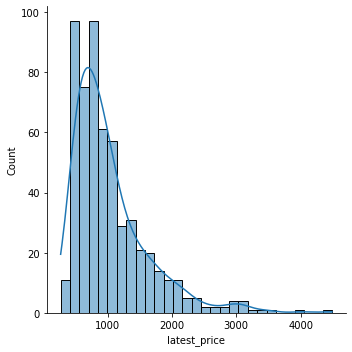

In [16]:
sns.displot(df['latest_price'], kde=True)

In [17]:
df['brand'].value_counts()

ASUS         154
Lenovo       101
HP            97
DELL          90
acer          29
MSI           29
APPLE         27
Avita         14
Infinix        4
Nokia          4
ALIENWARE      4
RedmiBook      3
realme         3
Smartron       2
Vaio           2
Mi             1
Name: brand, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

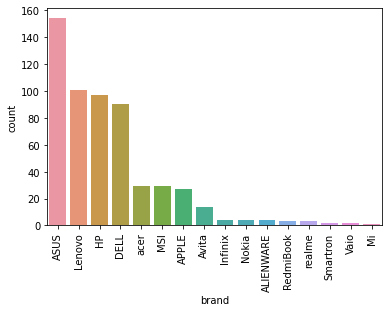

In [18]:
sns.countplot(data = df, x = 'brand', order = df['brand'].value_counts().index)
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

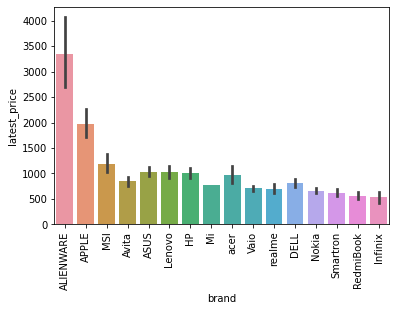

In [19]:
result = df.groupby(["brand"])['latest_price'].median().reset_index().sort_values('latest_price', ascending=False)

sns.barplot(data=df, x='brand', y="latest_price", order=result['brand'])
plt.xticks(rotation="vertical")

In [20]:
categoricals = df.select_dtypes(include=['object'])
categoricals

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,weight,display_size,Touchscreen,msoffice
5,Avita,PURA,AMD,APU Dual,10th,8 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,ThinNlight,14,No,No
6,HP,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,32-bit,Casual,14,No,No
8,HP,Athlon,AMD,Athlon Dual,10th,32 GB GB,DDR4,32 GB,0 GB,Windows,32-bit,Casual,14,No,No
10,ASUS,ExpertBook,Intel,Core i3,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,Casual,15.6,No,No
12,Lenovo,v15,Intel,Core i3,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,Casual,15.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,32-bit,Casual,16,No,No
890,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No


In [21]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 5 to 895
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            564 non-null    object
 1   model            564 non-null    object
 2   processor_brand  564 non-null    object
 3   processor_name   564 non-null    object
 4   processor_gnrtn  564 non-null    object
 5   ram_gb           564 non-null    object
 6   ram_type         564 non-null    object
 7   ssd              564 non-null    object
 8   hdd              564 non-null    object
 9   os               564 non-null    object
 10  os_bit           564 non-null    object
 11  weight           564 non-null    object
 12  display_size     564 non-null    object
 13  Touchscreen      564 non-null    object
 14  msoffice         564 non-null    object
dtypes: object(15)
memory usage: 86.7+ KB


In [22]:
df['ram_gb'] = df['ram_gb'].str.replace("GB GB", "")
df['ssd'] = df['ssd'].str.replace("GB", "")
df['hdd'] = df['hdd'].str.replace("GB", "")
df['os_bit'] = df['os_bit'].str.replace("-bit", "")

df['ram_gb'] = df['ram_gb'].astype('int64')
df['ssd'] = df['ssd'].astype('int64')
df['hdd'] = df['hdd'].astype('int64')
df['os_bit'] = df['os_bit'].astype('int64')

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df.brand = le.fit_transform(df.brand)
df.model = le.fit_transform(df.model)
df.processor_brand  = le.fit_transform(df.processor_brand )
df.processor_name = le.fit_transform(df.processor_name)
df.processor_gnrtn  = le.fit_transform(df.processor_gnrtn )
df.ram_type = le.fit_transform(df.ram_type)
df.os = le.fit_transform(df.os)
df.weight = le.fit_transform(df.weight)
df.display_size = le.fit_transform(df.display_size)
df.Touchscreen = le.fit_transform(df.Touchscreen)
df.msoffice = le.fit_transform(df.msoffice)

df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,display_size,warranty,Touchscreen,msoffice,latest_price,discount,star_rating,ratings,reviews
5,3,48,0,0,0,8,1,256,0,2,...,2,4,0,0,0,324.714137,25,3.7,1657,234
6,5,9,0,0,0,4,1,0,1024,2,...,0,4,0,0,0,271.569647,8,3.9,1185,141
8,5,14,0,1,0,32,1,32,0,2,...,0,4,0,0,0,349.519231,2,0.0,0,0
10,2,24,1,3,0,4,1,0,1024,2,...,0,10,0,0,0,450.220894,17,2.3,3,0
12,7,80,1,3,0,4,1,0,1024,2,...,0,10,0,0,0,519.737526,9,3.1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2,58,0,17,6,4,1,1024,0,2,...,0,11,0,0,0,1806.003119,34,0.0,0,0
890,2,56,0,17,6,4,1,1024,0,2,...,0,11,1,0,0,1767.021830,21,0.0,0,0
891,2,56,0,17,6,4,1,1024,0,2,...,0,11,1,0,0,1883.965696,25,0.0,0,0
893,2,58,0,17,6,4,1,1024,0,2,...,0,11,1,0,0,1857.978170,0,0.0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 5 to 895
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            564 non-null    int64  
 1   model            564 non-null    int64  
 2   processor_brand  564 non-null    int64  
 3   processor_name   564 non-null    int64  
 4   processor_gnrtn  564 non-null    int64  
 5   ram_gb           564 non-null    int64  
 6   ram_type         564 non-null    int64  
 7   ssd              564 non-null    int64  
 8   hdd              564 non-null    int64  
 9   os               564 non-null    int64  
 10  os_bit           564 non-null    int64  
 11  graphic_card_gb  564 non-null    int64  
 12  weight           564 non-null    int64  
 13  display_size     564 non-null    int64  
 14  warranty         564 non-null    int64  
 15  Touchscreen      564 non-null    int64  
 16  msoffice         564 non-null    int64  
 17  latest_price    

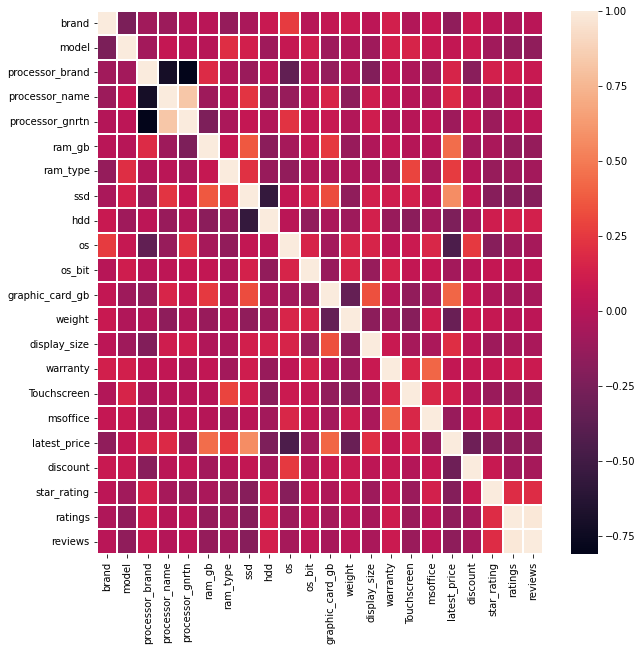

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), linewidth=1)

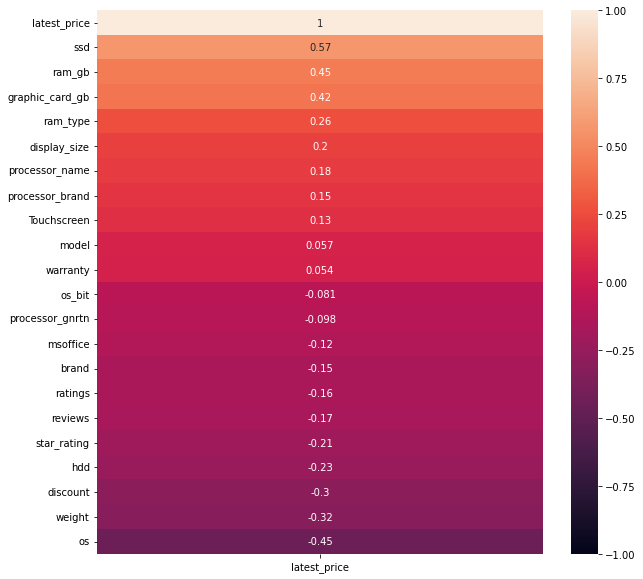

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr()[['latest_price']].sort_values(
    by=['latest_price'],ascending=False), vmin=-1,annot=True);

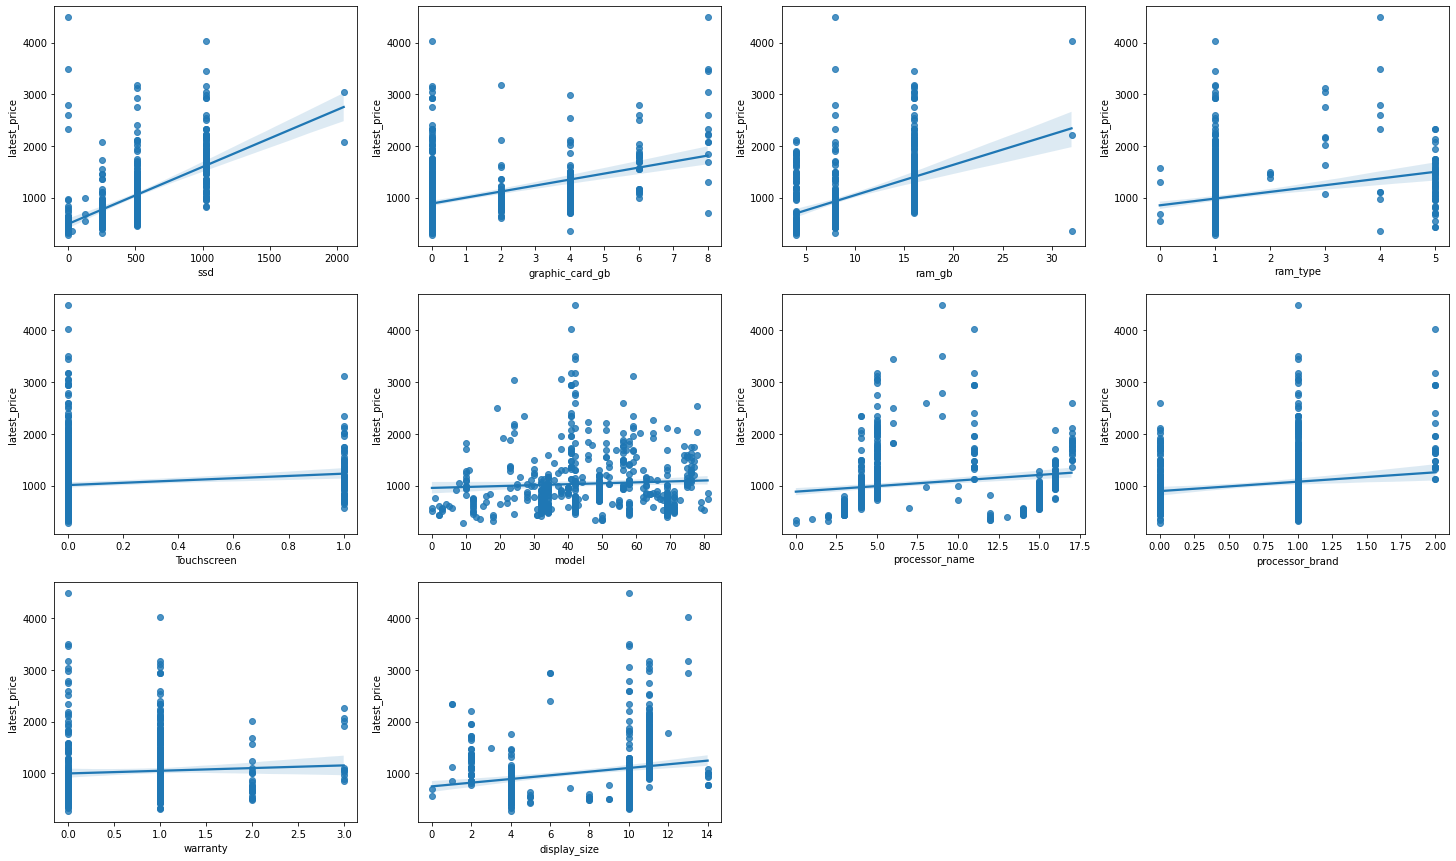

In [27]:
fig, axes = plt.subplots(3, 4, figsize=(25, 15))

sns.regplot(x="ssd", y="latest_price", data=df, ax=axes[0, 0])
sns.regplot(x="graphic_card_gb", y="latest_price", data=df, ax=axes[0, 1])
sns.regplot(x="ram_gb", y="latest_price", data=df, ax=axes[0, 2])
sns.regplot(x="ram_type", y="latest_price", data=df, ax=axes[0, 3])
sns.regplot(x="Touchscreen", y="latest_price", data=df, ax=axes[1, 0])
sns.regplot(x="model", y="latest_price", data=df, ax=axes[1, 1])
sns.regplot(x="processor_name", y="latest_price", data=df, ax=axes[1, 2])
sns.regplot(x="processor_brand", y="latest_price", data=df, ax=axes[1, 3])
sns.regplot(x="warranty", y="latest_price", data=df, ax=axes[2, 0])
sns.regplot(x="display_size", y="latest_price", data=df, ax=axes[2, 1])
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

Skewness: 1.911016


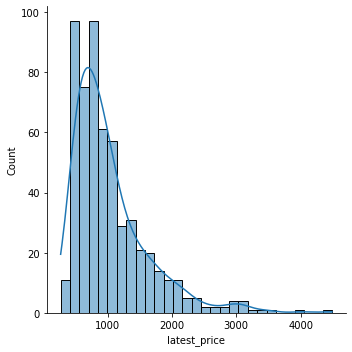

In [28]:
sns.displot(df['latest_price'], kde=True)
print("Skewness: %f" % df['latest_price'].skew())

Skewness: 0.481807


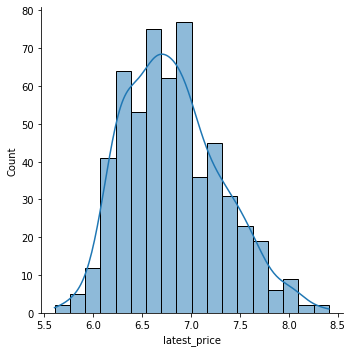

In [29]:
df["latest_price"] = np.log1p(df["latest_price"])
 
sns.displot(df['latest_price'], kde=True)
print("Skewness: %f" % df['latest_price'].skew())

### **Linear Regression**

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [31]:
features = ['ssd', 'ram_gb', 'graphic_card_gb', 'ram_type', 
            'display_size', 'processor_name', 'processor_brand', 
            'Touchscreen', 'model', 'warranty']

In [32]:
X = df[features]
y = df['latest_price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, 
                                                    random_state=42) 

In [34]:
lr_pipe = Pipeline([('scl',StandardScaler()), ('clf',LinearRegression())])

lr_pipe.fit(X_train,y_train)

y_pred = lr_pipe.predict(X_test)

print('Coefficient of Determination:', lr_pipe.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.7095955386893343
Mean Absolute Error: 0.20215650330363358
Mean Squared Error: 0.07746192765750519
Root Mean Squared Error: 0.27831982979569597


In [35]:
rf_pipe = Pipeline([('scl', StandardScaler()),('clf',RandomForestRegressor
                                               (n_estimators=50, 
                                                min_samples_split=5 ))])

rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)

print('Coefficient of Determination:', rf_pipe.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.8670379389759648
Mean Absolute Error: 0.13148386972285064
Mean Squared Error: 0.03546604451513065
Root Mean Squared Error: 0.18832430675600706


In [36]:
dt_pipe = Pipeline([('scl', StandardScaler()),('clf',DecisionTreeRegressor
                                               (random_state = 45))])

dt_pipe.fit(X_train, y_train)

y_pred = dt_pipe.predict(X_test)

print('Coefficient of Determination:', dt_pipe.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.7835868421662877
Mean Absolute Error: 0.1471842784827566
Mean Squared Error: 0.057725629629063795
Root Mean Squared Error: 0.2402615858373198


In [37]:
svr_pipe = Pipeline([('scl', StandardScaler()),('clf',SVR(kernel = 'rbf'))])

svr_pipe.fit(X_train, y_train)

y_pred = svr_pipe.predict(X_test)

print('Coefficient of Determination:', svr_pipe.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.805166068169713
Mean Absolute Error: 0.17142097865523204
Mean Squared Error: 0.0519696283746819
Root Mean Squared Error: 0.22796848109921228
